### Shapley value analysis


100%|██████████| 154/154 [04:10<00:00,  1.62s/it]


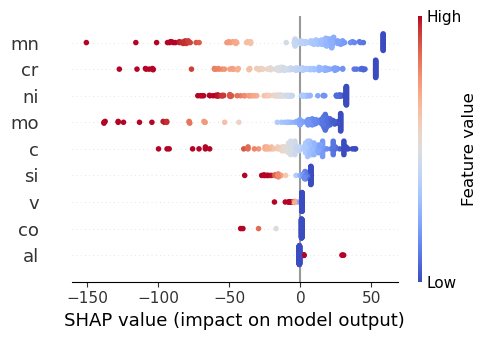

In [35]:
import shap
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colormaps

if len(X_total) > 500:
    print("Reducing the training set to 200 samples")
    X_total = X_total[np.random.choice(X_total.shape[0], 500, replace=False)]
# 1. Reduce training set to 10 representative samples using k-means
X_train_summary = shap.kmeans(X_total, 100)  # Reduce training set to 10 representative samples
# 2. Create the SHAP explainer using the ensemble prediction function
explainer = shap.KernelExplainer(lambda X: ensemble_predict(X, results_df, which_data), X_train_summary)



# 3. Compute SHAP values for X_test_final and X_total
shap_values_train = explainer.shap_values(X_total)     # Compute SHAP values for X_total

# 4. Prepare the output directory for results
results_path = Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries', 'results', 'shap')

# 5. Create DataFrames for SHAP values and features
shap_values_df_train = pd.DataFrame(shap_values_train, columns=[f"SHAP_{feature}" for feature in features])

# Convert and X_total to DataFrames if they're NumPy arrays
X_total_df = pd.DataFrame(X_total, columns=[f"X_{feature}" for feature in features])

# 6. Optionally, apply exponential transformation to SHAP values for specific datasets
if which_data in ['Bainite', 'Ferrite']:

    shap_values_train = np.exp(shap_values_train)

# 7. Combine the original features and SHAP values for both datasets
combined_df_train = pd.concat([X_total_df, shap_values_df_train], axis=1)

# 8. Save the data to CSV files
combined_df_train.to_csv(results_path/f"{which_data}_train.csv", index=False)

# 9. Create custom color map for the SHAP plots
cmap = colormaps.get_cmap('coolwarm')


# 11. Create the SHAP summary plot for X_total (training data)
shap.summary_plot(
    shap_values_train, 
    X_total, 
    feature_names=features, 
    plot_size=(5, 3.5), 
    color='coolwarm', 
    cmap=cmap
)




In [61]:
X_test_final[0,:]


array([8.41399835e-01, 4.84973929e-01, 3.86213124e+00, 0.00000000e+00,
       7.01539983e-02, 3.55770642e+00, 4.47111010e-01, 0.00000000e+00,
       3.08104606e-01, 4.00517382e+02, 9.60197490e-01])

In [36]:
features=features+['T',r'$\dot{T}$']

Reducing the training set to 2000 samples


100%|██████████| 1000/1000 [28:23<00:00,  1.70s/it]


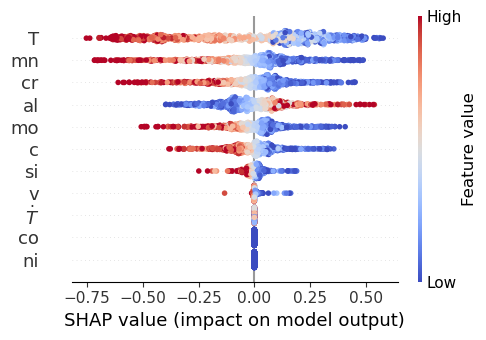

In [37]:
if len(X_test_final) > 1000:
    print("Reducing the training set to 2000 samples")
    X_test_final = X_test_final[np.random.choice(X_test_final.shape[0], 1000, replace=False)]
# 1. Reduce training set to 10 representative samples using k-means
X_train_summary = shap.kmeans(X_test_final, 1)  # Reduce training set to 10 representative samples
# 2. Create the SHAP explainer using the ensemble prediction function
explainer = shap.KernelExplainer(lambda X: ensemble_predict(X, results_df, which_data,classifiy=True), X_train_summary)



# 3. Compute SHAP values for X_test_final and X_total
shap_values_train = explainer.shap_values(X_test_final)     # Compute SHAP values for X_total

# 4. Prepare the output directory for results
results_path = Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries', 'results', 'shap')

# 5. Create DataFrames for SHAP values and features
shap_values_df_train = pd.DataFrame(shap_values_train, columns=[f"SHAP_{feature}" for feature in features])

# Convert X_test_final and X_total to DataFrames if they're NumPy arrays
X_test_final_df = pd.DataFrame(X_test_final, columns=[f"X_{feature}" for feature in features])

# 6. Optionally, apply exponential transformation to SHAP values for specific datasets
if which_data in ['Bainite', 'Ferrite']:

    shap_values_train = np.exp(shap_values_train)

# 7. Combine the original features and SHAP values for both datasets
combined_df_train = pd.concat([X_test_final_df, shap_values_df_train], axis=1)

# 8. Save the data to CSV files
combined_df_train.to_csv(results_path/f"{which_data}_train.csv", index=False)

# 9. Create custom color map for the SHAP plots
cmap = colormaps.get_cmap('coolwarm')


# 11. Create the SHAP summary plot for X_total (training data)
shap.summary_plot(
    shap_values_train, 
    X_test_final, 
    feature_names=features, 
    plot_size=(5, 3.5), 
    color='coolwarm', 
    cmap=cmap
)



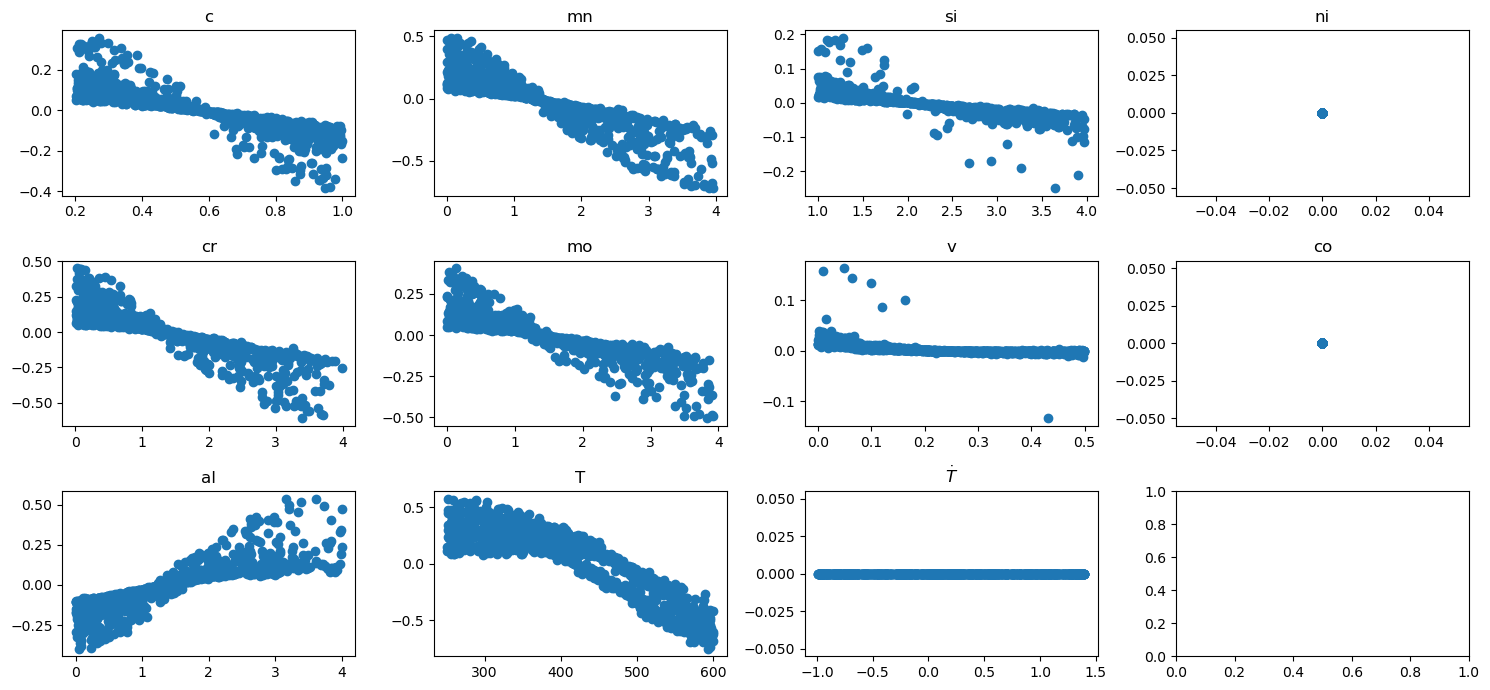

In [38]:
fig,ax=plt.subplots(3,4,figsize=(15,7))
ax=ax.flatten()
for k in range(11):
    ax[k].scatter(X_test_final[:,k],shap_values_train[:,k])
    ax[k].set_title(features[k])
fig.tight_layout()

In [59]:
int(np.max([np.shape(X_test_final)[0],100]))

1000

In [39]:
# Define path and models
import re 

results_path=Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries', 'results', 'shap')

model = 'Austensite'
model = 'Martensite_start'
# model = 'Bainite_start'
# model = 'Bainite'
# model = 'Martensite_start_RA'
# model = 'Ferrite_critCR'


for which in ["train", "test"]:
    # Load SHAP values
    shap_values_df = pd.read_csv(os.path.join(results_path, f"{model}_{which}.csv"))

    # Extract feature names and sort them alphabetically
    x_features = sorted([re.sub(r"^X_", "", col) for col in shap_values_df.columns if col.startswith("X_")])

    # Apply sorting order to SHAP values and X values
    shap_values_array = np.array([shap_values_df[f"SHAP_{feature}"].values for feature in x_features]).T
    x_values_array = np.array([shap_values_df[f"X_{feature}"].values for feature in x_features]).T

    # Format feature names for the plot
    x_features_plot = [f.capitalize() for f in x_features]

    # Plot summary
    shap.summary_plot(
        shap_values_array, 
        x_values_array, 
        feature_names=x_features_plot, 
        plot_size=(5, 3.5), 
        color='coolwarm', 
        cmap=cmap, 
        show=False, 
        sort=False
    )

    # Save plot
    plot_path = results_path / "plots" / f"{model}_{which}.png"
    plt.savefig(plot_path, bbox_inches='tight', dpi=300)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/b.schuscha/Bainite_Calculator/bainite_boundaries/bainite_boundaries/results/shap/Martensite_start_train.csv'